# Result Analysis

In [1]:
import os
import sys
import pandas as pd

# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Add src_path to the system path
sys.path.insert(0, src_path)

# Now you can import your module
import scripts.graph_utils as gru

### Load Data

In [2]:
# Data path directory
RESULTS_PATH = "../../results/"
NETWORKS_PATH = "../../data/"
IMAGES_PATH = "../../img/motifs_3/"

In [3]:
# Load data
def load_data(file):
    data = pd.read_csv(RESULTS_PATH + file)
    return data

## Twitter Egonets

In [4]:
# Load the Twitter data
file_name = "twitter_motifs_3_anchored.csv"
motif_twitter = load_data(file_name)
# cast graph_name as string
motif_twitter["graph_name"] = motif_twitter["graph_name"].astype(str)

In [5]:
motif_twitter

,graph_name,motif,average_count,standard_deviation,z_score,significance_profile,nodes,edges,max_degree,avg_degree
0,100318079_sample_sff_15,1,25.76,0.830662,-0.914932,-0.074725,33.0,342.0,26.5,20.727273
1,100318079_sample_sff_15,2,20.12,1.985783,2.961049,0.241836,33.0,342.0,26.5,20.727273
2,100318079_sample_sff_15,3,21.04,1.540563,-3.920645,-0.320208,33.0,342.0,26.5,20.727273
3,100318079_sample_sff_15,4,14.92,2.289833,-0.401776,-0.032814,33.0,342.0,26.5,20.727273
4,100318079_sample_sff_15,5,23.08,1.497776,2.617214,0.213754,33.0,342.0,26.5,20.727273
...,...,...,...,...,...,...,...,...,...,...
840,100318079_sample_rn_15,9,5.16,2.267157,6.104562,0.410843,30.0,196.0,14.5,13.066667
841,100318079_sample_rn_15,10,9.20,2.886751,2.701999,0.181847,30.0,196.0,14.5,13.066667
842,100318079_sample_rn_15,11,7.72,2.336664,-0.308132,-0.020738,30.0,196.0,14.5,13.066667
843,100318079_sample_rn_15,12,5.32,2.809508,4.869181,0.327701,30.0,196.0,14.5,13.066667


### Twitter Original Egonets

In [6]:
# Plot only the original graphs of Twitter
gru.plot_line_chart_with_images(
    motif_twitter[~motif_twitter["graph_name"].str.contains("sample")],
    f"Z-scores for Twitter Original Graphs from {file_name}",
    "motif",
    "significance_profile",
    IMAGES_PATH
)

In [7]:
motif_twitter.query(
    "graph_name.str.contains('sample') == False and motif == 1"
)[["graph_name", "nodes", "edges", "max_degree", "avg_degree"]].sort_values("nodes")

,graph_name,nodes,edges,max_degree,avg_degree
403,14203895,215.0,3640.0,85.0,33.860465
650,14338082,215.0,3237.0,135.5,30.111628
65,7861312,220.0,4740.0,78.5,43.090909
78,100318079,220.0,8354.0,110.0,75.945455
533,20060293,243.0,7542.0,120.5,62.074074


## Twitter Samples

In [8]:
sample_percents = ["20", "15", "10"]

selected_graph = "7861312"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    gru.plot_line_chart_with_images(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "motif",
        "significance_profile",
        IMAGES_PATH
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 1")
    )

                graph_name  motif  nodes   edges
65                 7861312      1  220.0  4740.0
299  7861312_sample_sff_20      1   44.0   415.0
455   7861312_sample_rn_20      1   39.0   178.0
507  7861312_sample_rpn_20      1   37.0   289.0
715   7861312_sample_rw_20      1   44.0   407.0


                graph_name  motif  nodes   edges
65                 7861312      1  220.0  4740.0
104   7861312_sample_rw_15      1   33.0   215.0
273   7861312_sample_rn_15      1   32.0    89.0
325  7861312_sample_rpn_15      1   25.0   101.0
494  7861312_sample_sff_15      1   33.0   364.0


                graph_name  motif  nodes   edges
65                 7861312      1  220.0  4740.0
143  7861312_sample_rpn_10      1   18.0    80.0
182   7861312_sample_rn_10      1   20.0    81.0
390   7861312_sample_rw_10      1   22.0   127.0
780  7861312_sample_sff_10      1   22.0    88.0


In [9]:
sample_percents = ["20", "15", "10"]

selected_graph = "14203895"

for sp in sample_percents:
    # Query data
    query_df = motif_twitter.query(
        "graph_name == @selected_graph or (graph_name.str.startswith(@selected_graph) and graph_name.str.endswith(@sp))",
    )

    gru.plot_line_chart_with_images(
        query_df,
        f"Z-scores for Twitter Generated Samples of {selected_graph}",
        "Motifs",
        "significance_profile",
        IMAGES_PATH
    )

    print(
        query_df[["graph_name", "motif", "nodes", "edges"]].query("motif == 1")
    )

                 graph_name  motif  nodes   edges
221  14203895_sample_rpn_20      1   34.0   309.0
403                14203895      1  215.0  3640.0
481   14203895_sample_rw_20      1   42.0   425.0
689   14203895_sample_rn_20      1   41.0   186.0
806  14203895_sample_sff_20      1   43.0   689.0


                 graph_name  motif  nodes   edges
39    14203895_sample_rn_15      1   25.0    74.0
208  14203895_sample_sff_15      1   32.0   225.0
286   14203895_sample_rw_15      1   32.0   270.0
403                14203895      1  215.0  3640.0
819  14203895_sample_rpn_15      1   18.0    96.0


                 graph_name  motif  nodes   edges
156   14203895_sample_rw_10      1   21.0   122.0
338  14203895_sample_sff_10      1   21.0   192.0
403                14203895      1  215.0  3640.0
429   14203895_sample_rn_10      1   16.0    31.0
559  14203895_sample_rpn_10      1   17.0    43.0


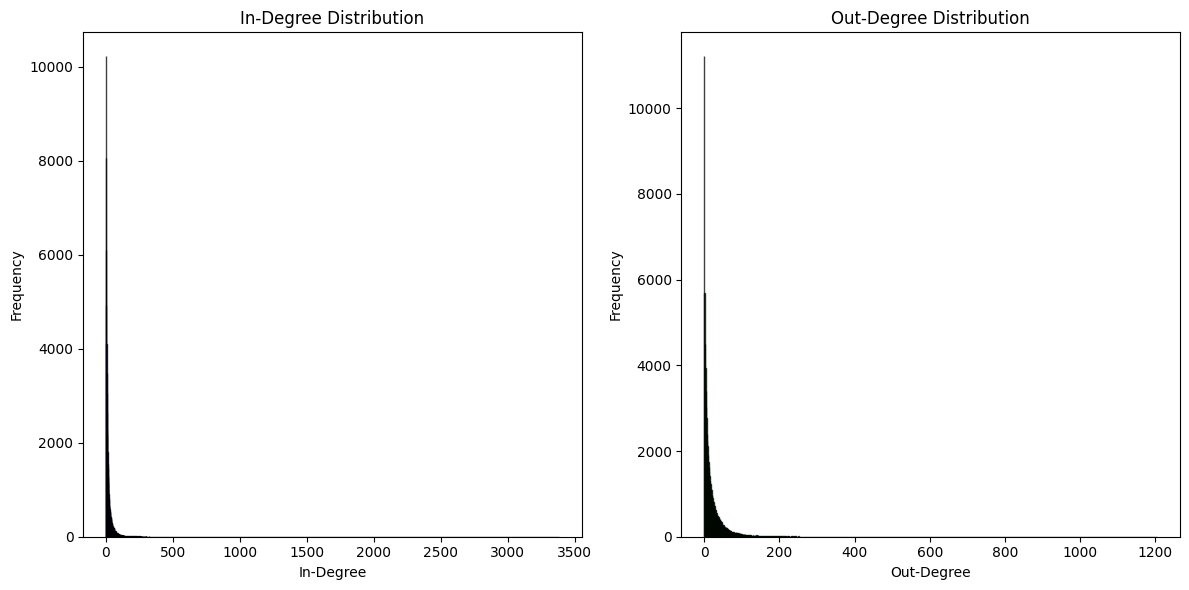

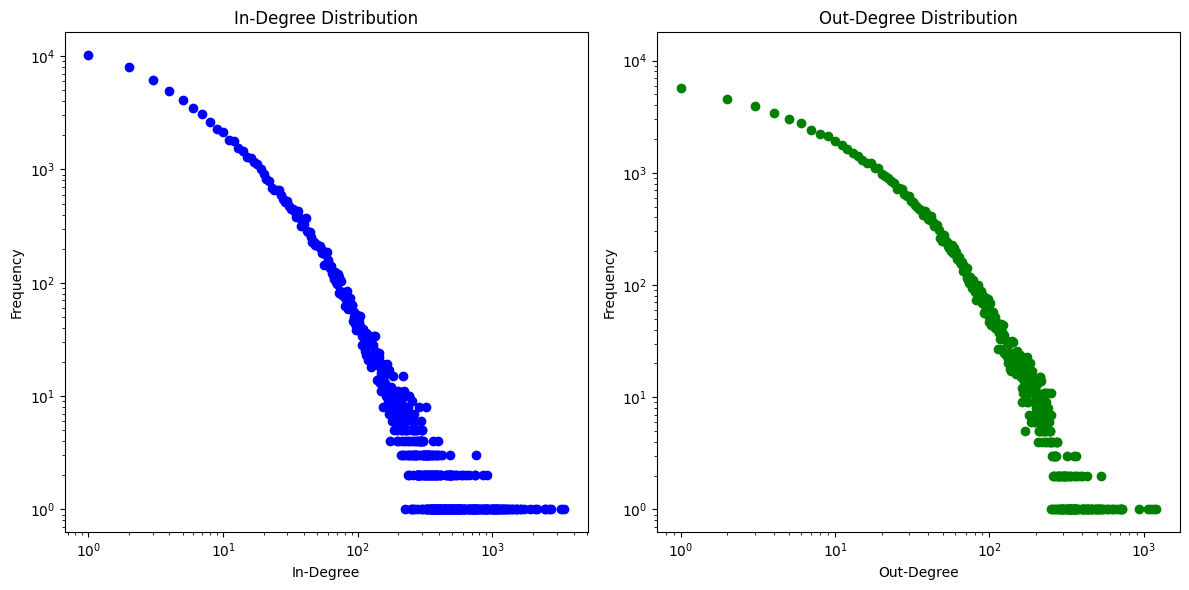

In [10]:
twitter_combined = gru.read_directed_graph_from_edge_list(
    "../../data/twitter_combined.edges"
)
gru.plot_degree_distribution(twitter_combined)
gru.plot_degree_distribution_scatter(twitter_combined)

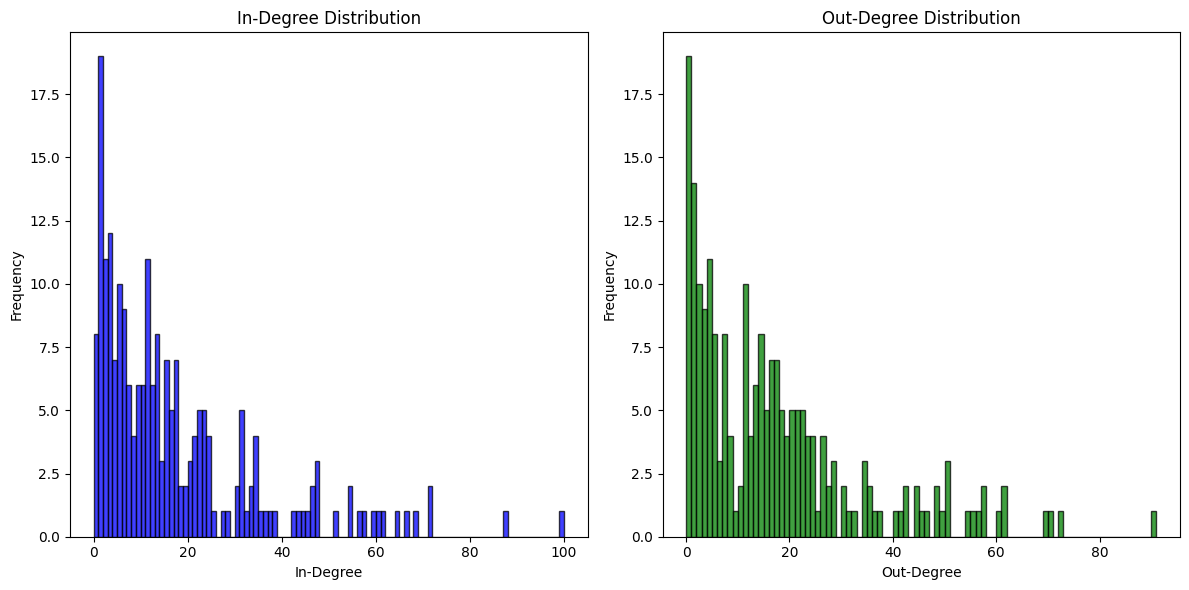

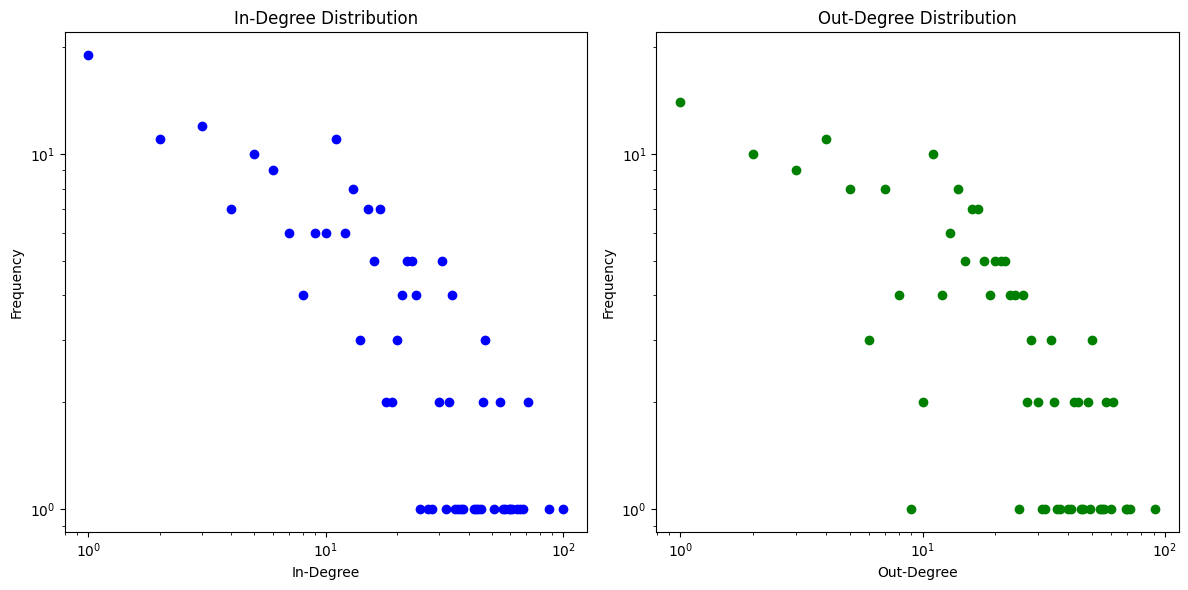

In [11]:
twitter_ego = gru.read_directed_graph_from_edge_list(
    "../../data/twitter/14203895.edges"
)
gru.plot_degree_distribution(twitter_ego)
gru.plot_degree_distribution_scatter(twitter_ego)

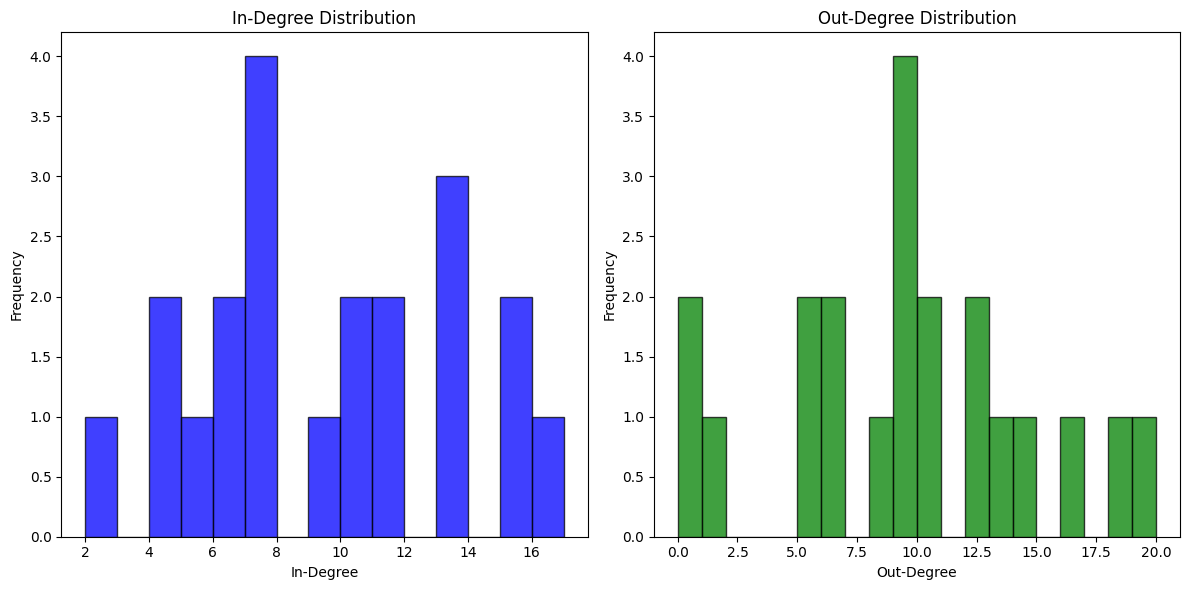

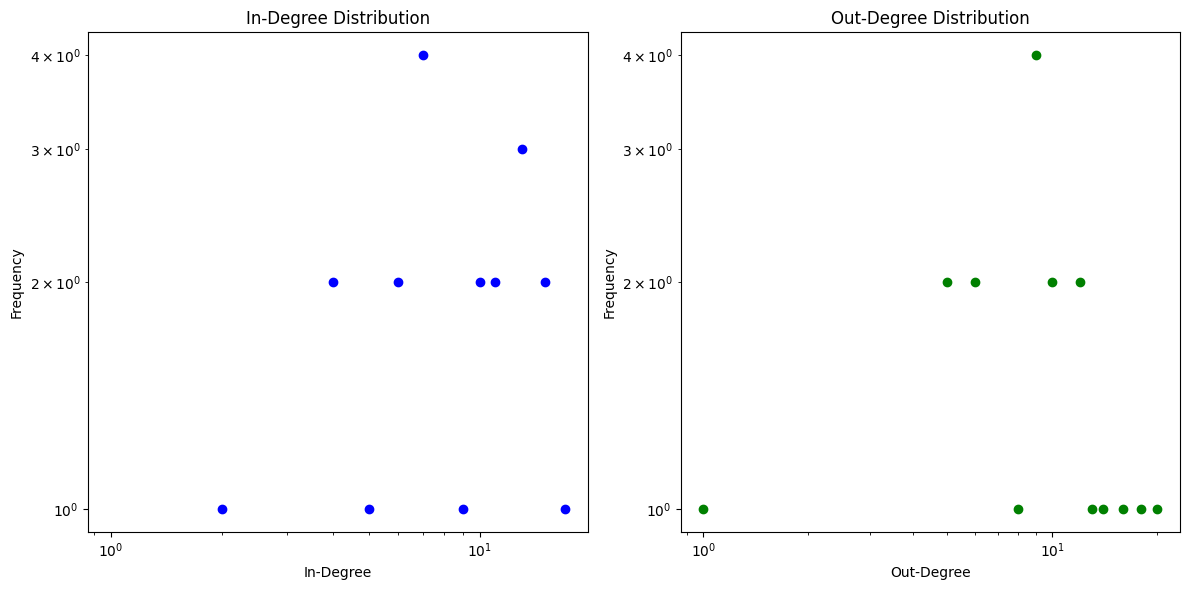

In [12]:
twitter_ssf_10 = gru.read_directed_graph_from_edge_list(
    "../../data/twitter_samples/14203895_sample_sff_10.edges"
)
gru.plot_degree_distribution(twitter_ssf_10)
gru.plot_degree_distribution_scatter(twitter_ssf_10)